<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/grafico_lista_ligada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Lista Ligada

In [50]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None  # Keeping track of the tail node

    def append(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
            self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node

    def print_list(self):
        cur_node = self.head
        while cur_node:
            print(cur_node.data)
            cur_node = cur_node.next

    def visualize_list(self):
        G = nx.DiGraph()
        node_labels = {}

        cur_node = self.head
        while cur_node:
            G.add_node(cur_node.data)
            node_labels[cur_node.data] = str(cur_node.data)
            if cur_node.prev:
                G.add_edge(cur_node.prev.data, cur_node.data)
            if cur_node.next:
                G.add_edge(cur_node.data, cur_node.next.data)
            cur_node = cur_node.next

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, font_size=10, font_family='sans-serif', node_color='lightblue', edge_color='gray')
        plt.show()

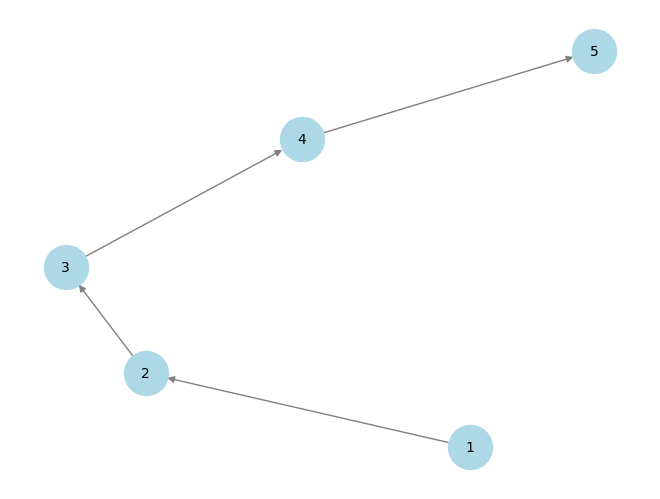

In [52]:
# Example usage:
dll = DoublyLinkedList()
dll.append(1)
dll.append(2)
dll.append(3)
dll.append(4)
dll.append(5)
dll.visualize_list()

# Tabela Hash

In [61]:
class HashTable:
    def __init__(self):
        self.size = 10
        self.table = [None] * self.size

    def hash_function(self, key):
        return key % self.size

    def insert(self, key, data):
        index = self.hash_function(key)
        if self.table[index] is None:
            self.table[index] = [(key, data)]
        else:
            self.table[index].append((key, data))

    def search(self, key):
        index = self.hash_function(key)
        bucket = self.table[index]
        if bucket is None:
            return None
        for i in range(len(bucket)):
            if bucket[i][0] == key:
                return bucket[i][1]
        return None

    def delete(self, key):
        index = self.hash_function(key)
        bucket = self.table[index]
        if bucket is None:
            return None
        for i in range(len(bucket)):
            if bucket[i][0] == key:
                bucket.pop(i)
                return

    def visualize(self):
        G = nx.DiGraph()

        for i in range(self.size):
            bucket = self.table[i]
            G.add_node(f"Bucket {i}")
            if bucket:
                for key, data in bucket:
                    G.add_node(f"({key}, {data})")
                    G.add_edge(f"Bucket {i}", f"({key}, {data})")

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_family='sans-serif', node_color='lightblue', edge_color='gray')
        plt.show()


In [62]:
# Criando uma instância da tabela hash
cadastro_clientes = HashTable()

# Adicionando clientes
cadastro_clientes.insert(1, "João")
cadastro_clientes.insert(9, "Maria")
# Adicionando clientes
cadastro_clientes.insert(2, "Carla")
cadastro_clientes.insert(4, "Francisco")

# Consultando um cliente
joao = cadastro_clientes.search(1)
print(f"Informações de João: {joao}")

# Verificando se Maria ainda está cadastrada
maria = cadastro_clientes.search(9)
print(f"Informações de Maria: {maria}")

Informações de João: João
Informações de Maria: Maria


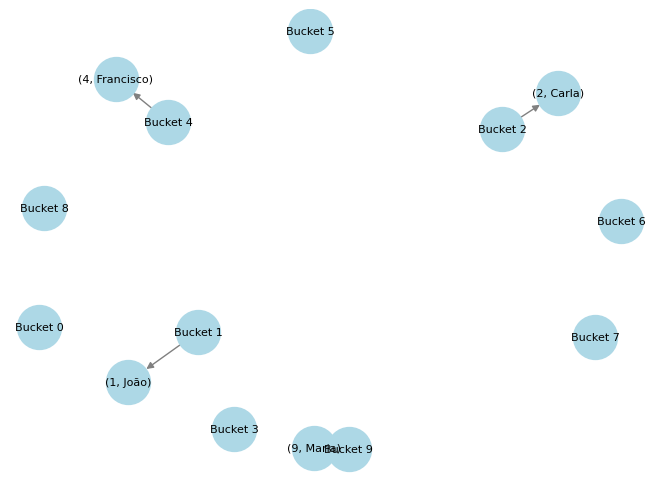

In [63]:
cadastro_clientes.visualize()

# Árvore Binária

In [65]:
class Node:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

class Tree:
    def __init__(self):
        self.root = None

    def insert(self, data):
        new_node = Node(data)
        if self.root is None:
            self.root = new_node
        else:
            self._insert_recursive(self.root, new_node)

    def _insert_recursive(self, node, new_node):
        if new_node.data < node.data:
            if node.left is None:
                node.left = new_node
            else:
                self._insert_recursive(node.left, new_node)
        else:
            if node.right is None:
                node.right = new_node
            else:
                self._insert_recursive(node.right, new_node)

    def visualize(self):
        G = nx.DiGraph()

        def add_node(node):
            if node:
                G.add_node(node.data)
                if node.left:
                    G.add_edge(node.data, node.left.data)
                    add_node(node.left)
                if node.right:
                    G.add_edge(node.data, node.right.data)
                    add_node(node.right)

        add_node(self.root)

        node_sizes = [500 for _ in G.nodes]
        node_sizes[0] = 800  # Make root node bigger
        pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
        nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=8, font_family='sans-serif', node_color='lightblue', edge_color='gray')
        plt.show()

In [66]:
# Criando uma árvore
tree = Tree()
tree.insert(3)
tree.insert(1)
tree.insert(4)
tree.insert(15)
tree.insert(9)
tree.insert(16)

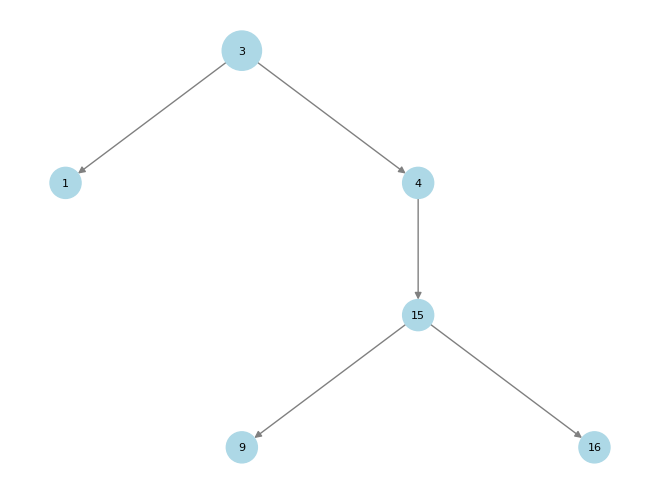

In [67]:
tree.visualize()